<img src="https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Word embedding

In [ ]:
import re
import bs4 as bs
import numpy as np
import pandas as pd
import multiprocessing
import urllib.request
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from keras.preprocessing.text import text_to_word_sequence
# Descargar el diccionario
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Para este ejercicio vamos a entrenar con artículos de wikipedia todos relacionados con aviación y ver cómo se relacionan entre sí. 

In [ ]:
corpus_text=''
corpus_sentence=[]

In [ ]:
tres_veinte_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Airbus_A320_family')
fh_html=urllib.request.urlopen('https://en.wikipedia.org/wiki/Airport')
ava_html=urllib.request.urlopen('https://en.wikipedia.org/wiki/Avianca')
flight_html=urllib.request.urlopen('https://en.wikipedia.org/wiki/Flight')
faa_html=urllib.request.urlopen('https://en.wikipedia.org/wiki/Federal_Aviation_Administration')

textos=[tres_veinte_html,fh_html,ava_html,flight_html,faa_html]

for texto in textos:
  raw_html = texto.read()
  article_html = bs.BeautifulSoup(raw_html, 'lxml')
  article_paragraphs = article_html.find_all('p')

  for parr in article_paragraphs:
    corpus_text+=parr.text
  
  corpus_sentence.append(corpus_text)

In [ ]:
corpus_sentence

['\nThe Airbus A320 family is a series of narrow-body airliners developed and produced by Airbus.\nThe A320 was launched in March 1984, first flew on 22 February 1987, and was introduced in April 1988 by Air France.\nThe first member of the family was followed by the longer A321 (first delivered in January 1994), the shorter A319 (April 1996), and the even shorter A318 (July 2003).\nFinal assembly takes place in Toulouse in France; Hamburg in Germany; Tianjin in China since 2009; and in Mobile, Alabama in the United States since April 2016.\nThe twinjet has a six-abreast cross-section and is powered by either CFM56 or IAE V2500 turbofans, except the CFM56/PW6000 powered A318.\nThe family pioneered the use of digital fly-by-wire and side-stick flight controls in airliners.\nVariants offer maximum take-off weights from 68 to 93.5\xa0t (150,000 to 206,000\xa0lb), to cover a 5,740–6,940\xa0km (3,100–3,750\xa0nmi) range.\nThe 31.4\xa0m (103\xa0ft) long A318 typically accommodates 107 to 132

In [ ]:
#Revisemos qué obtuvimos
corpus_text

'\nThe Airbus A320 family is a series of narrow-body airliners developed and produced by Airbus.\nThe A320 was launched in March 1984, first flew on 22 February 1987, and was introduced in April 1988 by Air France.\nThe first member of the family was followed by the longer A321 (first delivered in January 1994), the shorter A319 (April 1996), and the even shorter A318 (July 2003).\nFinal assembly takes place in Toulouse in France; Hamburg in Germany; Tianjin in China since 2009; and in Mobile, Alabama in the United States since April 2016.\nThe twinjet has a six-abreast cross-section and is powered by either CFM56 or IAE V2500 turbofans, except the CFM56/PW6000 powered A318.\nThe family pioneered the use of digital fly-by-wire and side-stick flight controls in airliners.\nVariants offer maximum take-off weights from 68 to 93.5\xa0t (150,000 to 206,000\xa0lb), to cover a 5,740–6,940\xa0km (3,100–3,750\xa0nmi) range.\nThe 31.4\xa0m (103\xa0ft) long A318 typically accommodates 107 to 132 

Hacemos el preprocesamiento de los datos:

In [ ]:
article_text = corpus_text.lower()
text = re.sub(r'\[[0-9]*\]', ' ', article_text)
text = re.sub(r'\s+', ' ', text)

In [ ]:
article_text

'\nthe airbus a320 family is a series of narrow-body airliners developed and produced by airbus.\nthe a320 was launched in march 1984, first flew on 22 february 1987, and was introduced in april 1988 by air france.\nthe first member of the family was followed by the longer a321 (first delivered in january 1994), the shorter a319 (april 1996), and the even shorter a318 (july 2003).\nfinal assembly takes place in toulouse in france; hamburg in germany; tianjin in china since 2009; and in mobile, alabama in the united states since april 2016.\nthe twinjet has a six-abreast cross-section and is powered by either cfm56 or iae v2500 turbofans, except the cfm56/pw6000 powered a318.\nthe family pioneered the use of digital fly-by-wire and side-stick flight controls in airliners.\nvariants offer maximum take-off weights from 68 to 93.5\xa0t (150,000 to 206,000\xa0lb), to cover a 5,740–6,940\xa0km (3,100–3,750\xa0nmi) range.\nthe 31.4\xa0m (103\xa0ft) long a318 typically accommodates 107 to 132 

In [ ]:
text

' the airbus a320 family is a series of narrow-body airliners developed and produced by airbus. the a320 was launched in march 1984, first flew on 22 february 1987, and was introduced in april 1988 by air france. the first member of the family was followed by the longer a321 (first delivered in january 1994), the shorter a319 (april 1996), and the even shorter a318 (july 2003). final assembly takes place in toulouse in france; hamburg in germany; tianjin in china since 2009; and in mobile, alabama in the united states since april 2016. the twinjet has a six-abreast cross-section and is powered by either cfm56 or iae v2500 turbofans, except the cfm56/pw6000 powered a318. the family pioneered the use of digital fly-by-wire and side-stick flight controls in airliners. variants offer maximum take-off weights from 68 to 93.5 t (150,000 to 206,000 lb), to cover a 5,740–6,940 km (3,100–3,750 nmi) range. the 31.4 m (103 ft) long a318 typically accommodates 107 to 132 passengers. the 124-156 se

Tokenizamos el texto

In [ ]:
corpus_token = nltk.sent_tokenize(text)
words_token = nltk.word_tokenize(text)

In [ ]:
sentence_tokens=[]

#for txto in text():
#  sentence_tokens.append(text_to_word_sequence(txto)

k=text_to_word_sequence(text)

In [ ]:
k

['the',
 'airbus',
 'a320',
 'family',
 'is',
 'a',
 'series',
 'of',
 'narrow',
 'body',
 'airliners',
 'developed',
 'and',
 'produced',
 'by',
 'airbus',
 'the',
 'a320',
 'was',
 'launched',
 'in',
 'march',
 '1984',
 'first',
 'flew',
 'on',
 '22',
 'february',
 '1987',
 'and',
 'was',
 'introduced',
 'in',
 'april',
 '1988',
 'by',
 'air',
 'france',
 'the',
 'first',
 'member',
 'of',
 'the',
 'family',
 'was',
 'followed',
 'by',
 'the',
 'longer',
 'a321',
 'first',
 'delivered',
 'in',
 'january',
 '1994',
 'the',
 'shorter',
 'a319',
 'april',
 '1996',
 'and',
 'the',
 'even',
 'shorter',
 'a318',
 'july',
 '2003',
 'final',
 'assembly',
 'takes',
 'place',
 'in',
 'toulouse',
 'in',
 'france',
 'hamburg',
 'in',
 'germany',
 'tianjin',
 'in',
 'china',
 'since',
 '2009',
 'and',
 'in',
 'mobile',
 'alabama',
 'in',
 'the',
 'united',
 'states',
 'since',
 'april',
 '2016',
 'the',
 'twinjet',
 'has',
 'a',
 'six',
 'abreast',
 'cross',
 'section',
 'and',
 'is',
 'powered',

In [ ]:
corpus_token[:10]

[' the airbus a320 family is a series of narrow-body airliners developed and produced by airbus.',
 'the a320 was launched in march 1984, first flew on 22 february 1987, and was introduced in april 1988 by air france.',
 'the first member of the family was followed by the longer a321 (first delivered in january 1994), the shorter a319 (april 1996), and the even shorter a318 (july 2003).',
 'final assembly takes place in toulouse in france; hamburg in germany; tianjin in china since 2009; and in mobile, alabama in the united states since april 2016. the twinjet has a six-abreast cross-section and is powered by either cfm56 or iae v2500 turbofans, except the cfm56/pw6000 powered a318.',
 'the family pioneered the use of digital fly-by-wire and side-stick flight controls in airliners.',
 'variants offer maximum take-off weights from 68 to 93.5 t (150,000 to 206,000 lb), to cover a 5,740–6,940 km (3,100–3,750 nmi) range.',
 'the 31.4 m (103 ft) long a318 typically accommodates 107 to 132 p

In [ ]:
words_token[:20]

['the',
 'airbus',
 'a320',
 'family',
 'is',
 'a',
 'series',
 'of',
 'narrow-body',
 'airliners',
 'developed',
 'and',
 'produced',
 'by',
 'airbus',
 '.',
 'the',
 'a320',
 'was',
 'launched']

In [ ]:
lemmatizer = WordNetLemmatizer()
def perform_lemmatization(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# ord() nos da el código Unicode para un caracter dado
punctuation_removal = dict((ord(punctuation), None) for punctuation in string.punctuation)

def get_processed_text(document):
    # 1 - reduce el texto a mínuscula (string.lower())
    # 2 - quitar los simbolos de puntuacion (string.translate())
    # 3 - realiza la tokenización (nltk.word_tokenize)
    # 4 - realiza la lematización (nuestra función perform_lemmatization)
    return perform_lemmatization(nltk.word_tokenize(document.lower().translate(punctuation_removal)))

Creamos los vectores

In [ ]:
#Hacemos esto de forma que podamos ver el loss de cada época
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [ ]:
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     size=300,       # dimensionalidad de los vectores 
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)   

In [ ]:
w2v_model.build_vocab([k])

Entrenamos el modelos

In [ ]:
w2v_model.train([k],
                 total_examples=w2v_model.corpus_count,
                 epochs=1000,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 221414.140625
Loss after epoch 1: 118116.828125
Loss after epoch 2: 115873.75
Loss after epoch 3: 116031.90625
Loss after epoch 4: 115955.25
Loss after epoch 5: 118314.0625
Loss after epoch 6: 118047.25
Loss after epoch 7: 117305.875
Loss after epoch 8: 105283.0625
Loss after epoch 9: 104366.375
Loss after epoch 10: 101495.875
Loss after epoch 11: 100892.5
Loss after epoch 12: 99887.5
Loss after epoch 13: 99024.0
Loss after epoch 14: 98380.875
Loss after epoch 15: 97710.875
Loss after epoch 16: 97725.5
Loss after epoch 17: 96453.875
Loss after epoch 18: 90739.0
Loss after epoch 19: 84043.75
Loss after epoch 20: 83321.0
Loss after epoch 21: 82023.25
Loss after epoch 22: 81357.25
Loss after epoch 23: 80631.5
Loss after epoch 24: 79790.25
Loss after epoch 25: 79025.25
Loss after epoch 26: 78378.0
Loss after epoch 27: 77462.0
Loss after epoch 28: 76605.0
Loss after epoch 29: 76523.25
Loss after epoch 30: 75247.75
Loss after epoch 31: 74275.5
Loss after epoch 32: 74161.5

(10000000, 23201000)

In [ ]:
#Buscamos la palabra más cercana a Avianca
w2v_model.wv.most_similar(positive=["avianca"], topn=10)

[('colombia', 0.379508376121521),
 ('york', 0.31013646721839905),
 ('airline', 0.2985038459300995),
 ("avianca's", 0.28908783197402954),
 ('united', 0.28889840841293335),
 ('taca', 0.2876374125480652),
 ('group', 0.28655683994293213),
 ('announced', 0.2859419286251068),
 ('december', 0.27859193086624146),
 ('filed', 0.27794986963272095)]

In [ ]:
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                   
import numpy as np                                  

def reduce_dimensions(model):
    num_dimensions = 2  

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [ ]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

x_vals, y_vals, labels = reduce_dimensions(w2v_model)

MAX_WORDS=100
fig = px.scatter(x=x_vals[:MAX_WORDS], y=y_vals[:MAX_WORDS], text=labels[:MAX_WORDS])
fig.show(renderer="colab") # esto para plotly en colab

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Probemos con algunos términos adicionales, y veamos qué sucede.

In [ ]:
print('------------Palabra: Avianca------------')
#Primero vamos a veverificar qué pasa con una palabra que se encuentra cerca de otras en el ScatterPlot
print('La similitud entre las palabras Boeing y Avianca es:',w2v_model.similarity("boeing","avianca"))
print('La similitud entre las palabras a320 y Avianca es:',w2v_model.similarity("a320","avianca"))
print('La similitud entre las palabras Colombia y Avianca es:',w2v_model.similarity("colombia","avianca"))
print('La similitud entre las palabras Airlines y Avianca es:',w2v_model.similarity("airlines","avianca"))
#print('La similitud entre las palabras Ubuntu y Avianca es:',w2v_model.similarity("ubuntu","avianca"))

print('------------Palabra: Thrust------------')
#Luego vamos  a ver qué pasa con una palabra que está lejos de las otras en el scatterplot
print('La similitud entre las palabras Wing y Thrust es:',w2v_model.similarity("wing","thrust"))
print('La similitud entre las palabras Commercial y Thrust es:',w2v_model.similarity("commercial","thrust"))
print('La similitud entre las palabras Weight y Thrust es:',w2v_model.similarity("weight","thrust"))
print('La similitud entre las palabras a320 y Avianca es:',w2v_model.similarity("aircraft","thrust"))

print('------------Palabra: FAA/Aviation-----------')
#Finalmente veamos qué sucede cuando invierto el orden de las palabras en el método similarity
print('La similitud entre las palabras faa y thrust es:',w2v_model.similarity("faa","thrust"))
print('La similitud entre las palabras thrust y faa es:',w2v_model.similarity("thrust","faa"))
print('La similitud entre las palabras Commercial y Aviation es:',w2v_model.similarity("commercial","aviation"))
print('La similitud entre las palabras Aviation y Commercial es:',w2v_model.similarity("aviation","commercial"))


------------Palabra: Avianca------------
La similitud entre las palabras Boeing y Avianca es: 0.17413263
La similitud entre las palabras a320 y Avianca es: 0.14393103
La similitud entre las palabras Colombia y Avianca es: 0.3795084
La similitud entre las palabras Airlines y Avianca es: 0.18838151
------------Palabra: Thrust------------
La similitud entre las palabras Wing y Thrust es: 0.19705433
La similitud entre las palabras Commercial y Thrust es: 0.0126576675
La similitud entre las palabras Weight y Thrust es: 0.2578626
La similitud entre las palabras a320 y Avianca es: 0.14008565
------------Palabra: FAA------------
La similitud entre las palabras faa y thrust es: 0.18428637
La similitud entre las palabras thrust y faa es: 0.18428637
La similitud entre las palabras a320 y Avianca es: 0.22592965
La similitud entre las palabras a320 y Avianca es: 0.22592965


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12:

In [ ]:
def reduce_dimensions2(model):
    num_dimensions = 3  

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    z_vals=[v[2] for v in vectors]
    return x_vals, y_vals,z_vals, labels

In [ ]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

x_vals2, y_vals2, z_vals2, labels2 = reduce_dimensions2(w2v_model)

MAX_WORDS=100
fig2 = px.scatter_3d(x=x_vals2[:MAX_WORDS], y=y_vals2[:MAX_WORDS],z=z_vals2[:MAX_WORDS], text=labels2[:MAX_WORDS])
fig2.show(renderer="colab") # esto para plotly en colab

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Hablemos un poco de los resultados anteriores. Antes de empezar, es de notar que la palabra Avianca se encuentra dentro de las páginas consultadas por el código, por lo que podremos hacer un pequeño control (no muy estricto) de la cuenta de las diferentes palabras revisadas en los artículos. Siendo así:

Vemos que al comparar Avianca con las siguientes palabras obtenemos una similitud de:

* Boeing:0,174 (29 veces en el artículo)
* A320: 0,144 (8 veces en el artículo)
* Colombia: 0,379 (59 veces en el artíulo)
* Airlines: 0,188 (28 veces en el artículo)

Podemos ver entonces que si bien, al aumentar la cantidad de veces que los términos son mencionados en el artículo, la similitud entre los términos sí aumenta, no podremos necesariamente predecir el aumento de manera lineal. Esto es especialmente notorio al tratar de extrapolar los valores obtenidos a A320 con 8 observaciones, a la palabra Colombia, que tiene 59 y en cuyo caso obtendríamos una similitud de 1,062 si se comportara de manera lineal. 

Por otro lado, de la palabra Thrust podemos obervar que aún después de una reducción de dimensionalidad, aplica que la similitud se encuentra ordenada de manera directamente proporcional a la distancia que se observa en el scatterPlot. Esto nos podría indicar que la similitud estaría calculada a través de la distancia euclídea entre los vectores.Esto lo podemos reforzar al observar que:

1. Al invertir las palabras (como en el caso de FAA y Thrust), obtenemos el mismo valor

2. Las distancias se mantienen al graficar en 3D: Un ejemplo es que commercial se encuentra más cerca de most que de airports en ambos casos. 

Hablemos ahora un poco de los ScatterPlots: Hay 3 regiones de particular interés:

1. Una región en la que encontramos las palabras más del "día a día" usadas en aviación, que usarían más las personas que no se encuentran involucradas directamente en la industria (aunque algunas sean de corte técnico): 

* Pasajero
* Pista
* Aerolínea
* Internacional

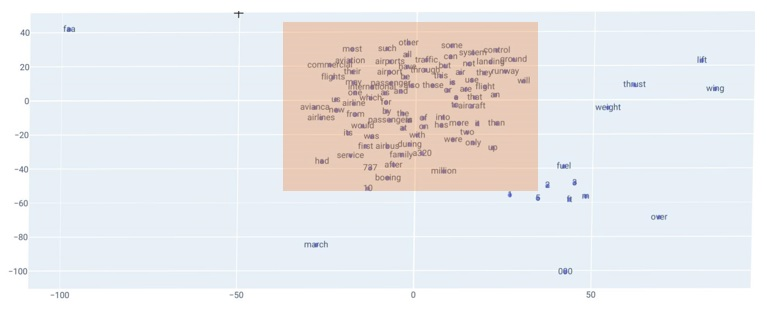

2. Encontramos una segunda región en la que se encuentran algunas palabras más técnicas:

* Ala
* Sustentación
* Peso
* Empuje

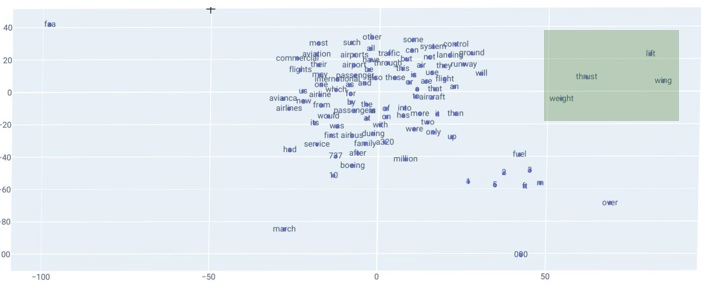

3. Finalmente, es muy notorio que, indepedientemente de si alguna palabra se encuentra en la región 1, o en la región 2, palabras más comunes (como pasajero) se encontrarán a la izquierda del eje X, mmientras que palabras de corte técnico estarán a la derecha.

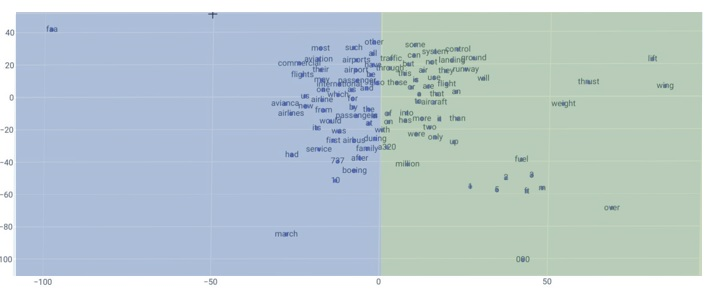

Siendo así, se hace muy visible que las palabras se están agrupando de la manera correcta, de una manera muy similar a como lo haría una persona a la que le fue encargada esta tarea.